# Naive Bayes Classifier

In [1]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":12,"axes.titlesize":12,"axes.labelsize":12}) 

import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
plot.style.use('seaborn-white')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


Loading data from sklearn wine datasets

In [2]:
wines = datasets.load_wine()
data = pd.DataFrame(data= np.c_[wines['data'], wines['target']], columns= wines['feature_names'] + ['target'])
data.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [3]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Data exploration:

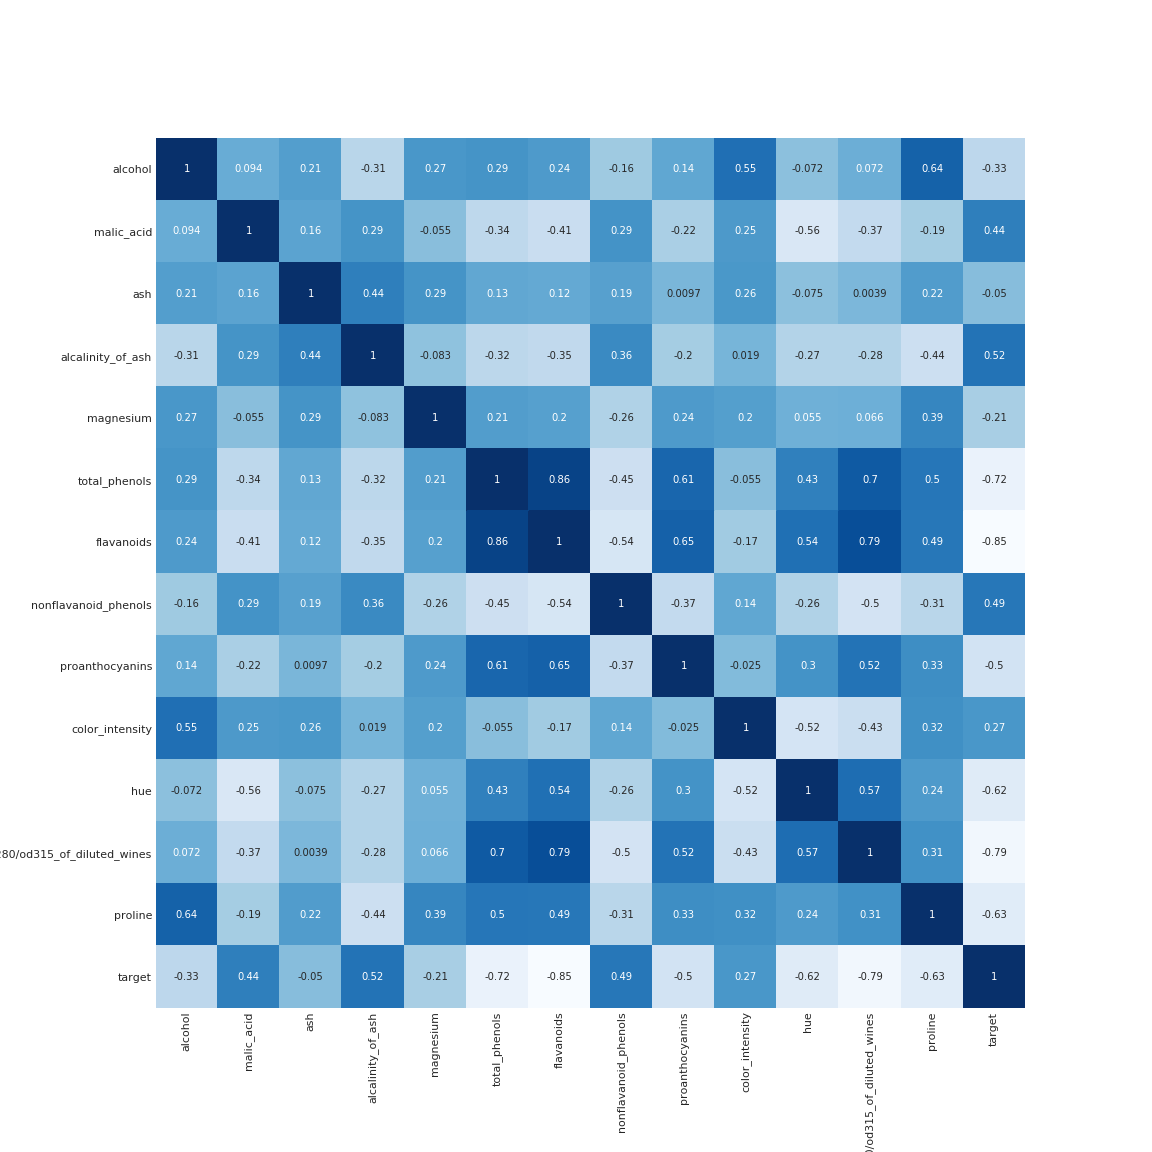

In [4]:
conv_matrix = data.corr(method='pearson')
plot.figure(figsize=(16, 16))
sns.heatmap(conv_matrix, square=True, annot=True, cmap="Blues", cbar=False, xticklabels=True, yticklabels=True)

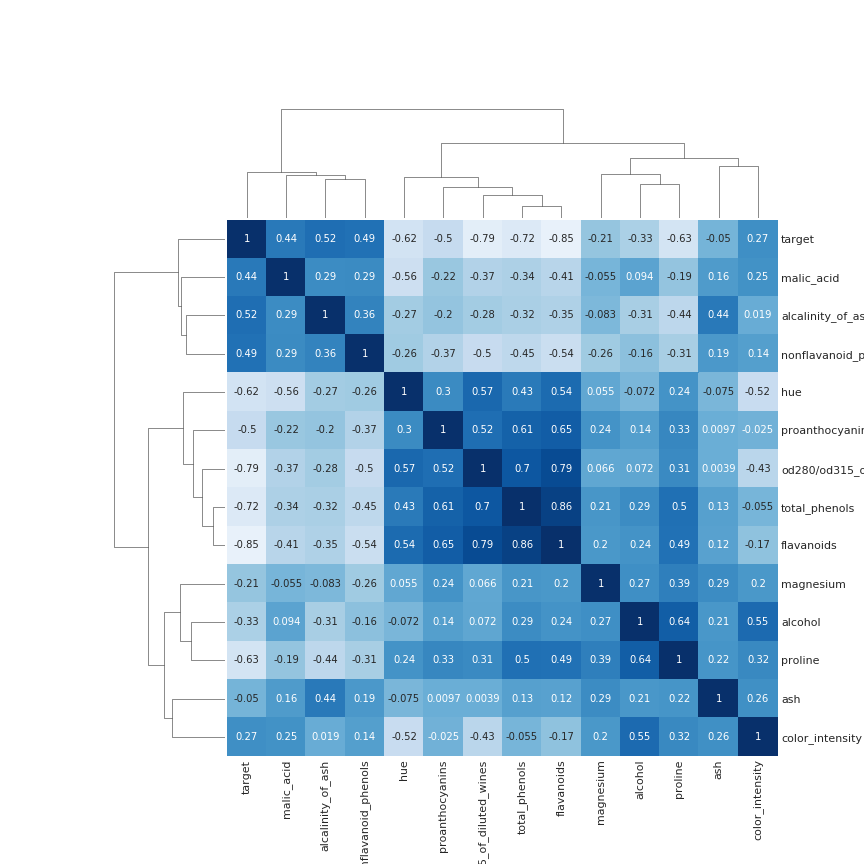

In [5]:
cluster_map = sns.clustermap(conv_matrix, annot=True, center=0, cmap="Blues", figsize=(12, 12))
cluster_map.cax.set_visible(False)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


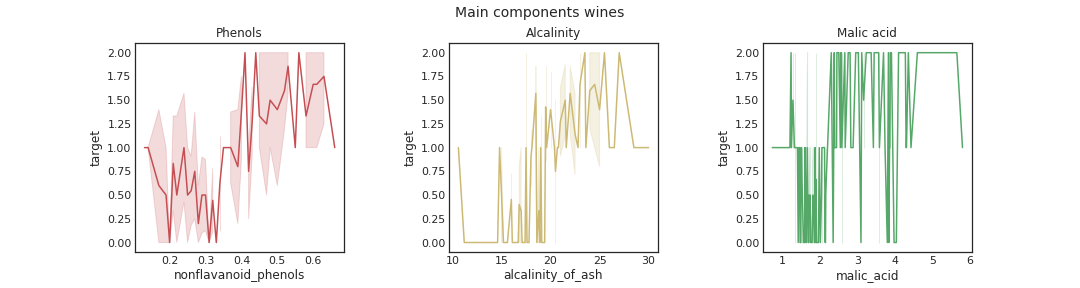

In [6]:
fig = plot.figure(figsize=(15,4))
title = fig.suptitle("Main components wines", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.5)

ax1 = fig.add_subplot(1,3,1)
ax1.set_title("Phenols")
sns.lineplot(x='nonflavanoid_phenols', y='target', data=data, ax=ax1, color='r')

ax2 = fig.add_subplot(1,3,2)
ax2.set_title("Alcalinity")
sns.lineplot(x='alcalinity_of_ash', y='target', data=data, ax=ax2, color='y')

ax3 = fig.add_subplot(1,3,3)
ax3.set_title("Malic acid")
sns.lineplot(x='malic_acid', y='target', data=data, ax=ax3, color='g')

In [7]:
dt = data[['nonflavanoid_phenols', 'alcalinity_of_ash','malic_acid', 'target']]
dt.head()

,nonflavanoid_phenols,alcalinity_of_ash,malic_acid,target
0,0.28,15.6,1.71,0.0
1,0.26,11.2,1.78,0.0
2,0.30,18.6,2.36,0.0
3,0.24,16.8,1.95,0.0
4,0.39,21.0,2.59,0.0


In [8]:
dt.describe()

,nonflavanoid_phenols,alcalinity_of_ash,malic_acid,target
count,178.000000,178.000000,178.000000,178.000000
mean,0.361854,19.494944,2.336348,0.938202
std,0.124453,3.339564,1.117146,0.775035
min,0.130000,10.600000,0.740000,0.000000
25%,0.270000,17.200000,1.602500,0.000000
50%,0.340000,19.500000,1.865000,1.000000
75%,0.437500,21.500000,3.082500,2.000000
max,0.660000,30.000000,5.800000,2.000000


#### Naive bayes on the main components found by clustermap

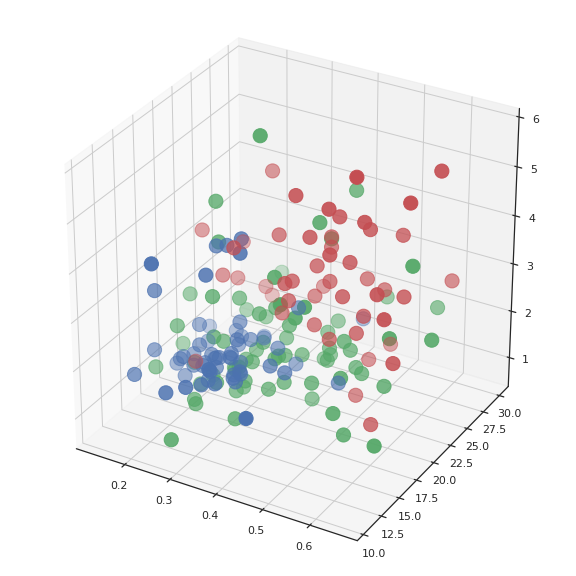

In [9]:
f = plot.figure(figsize=(8, 8))
ax = Axes3D(f)
dt = data[['nonflavanoid_phenols', 'alcalinity_of_ash','malic_acid', 'target']]
targets = [0,1,2]
colors = ['b', 'g' , 'r']
for target, color in zip(targets, colors):
    ax.scatter(dt.loc[dt['target']==target, 'nonflavanoid_phenols'], 
               dt.loc[dt['target']==target, 'alcalinity_of_ash'],
               dt.loc[dt['target']==target, 'malic_acid'], s=200, c=color, marker='o')
plot.show()

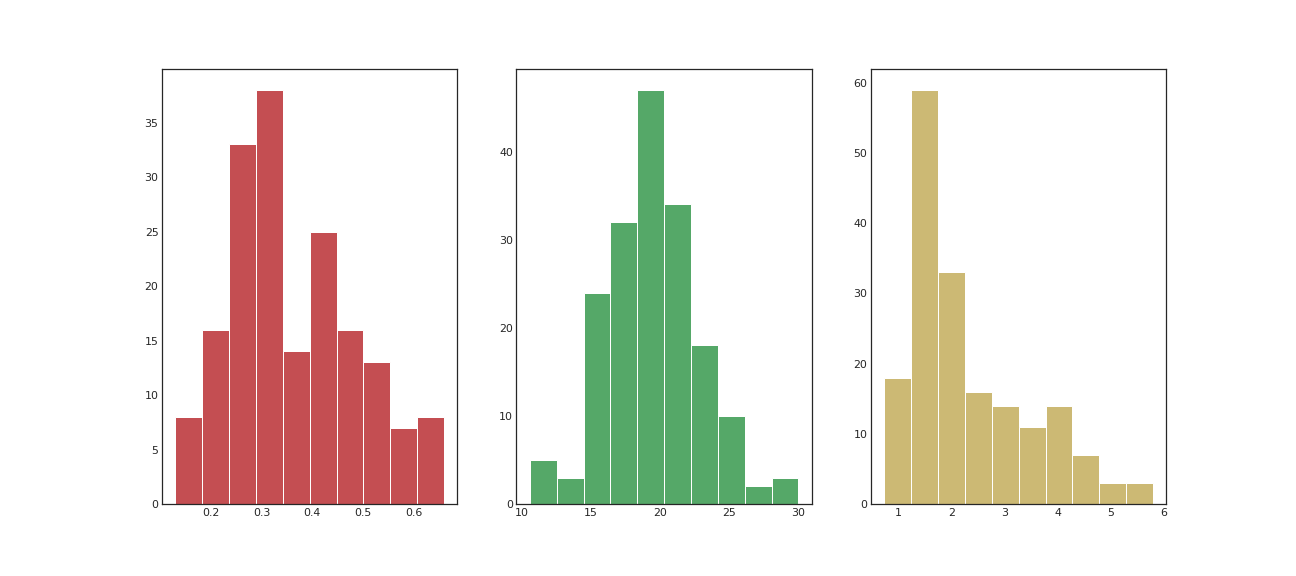

In [10]:
f = plot.figure(figsize=(18, 8))
ax1 = f.add_subplot(1, 3, 1)
ax1.hist(dt['nonflavanoid_phenols'], color='r')
ax2 = f.add_subplot(1, 3, 2)
ax2.hist(dt['alcalinity_of_ash'], color='g')
ax3 = f.add_subplot(1, 3, 3)
ax3.hist(dt['malic_acid'], color='y')
plot.show()

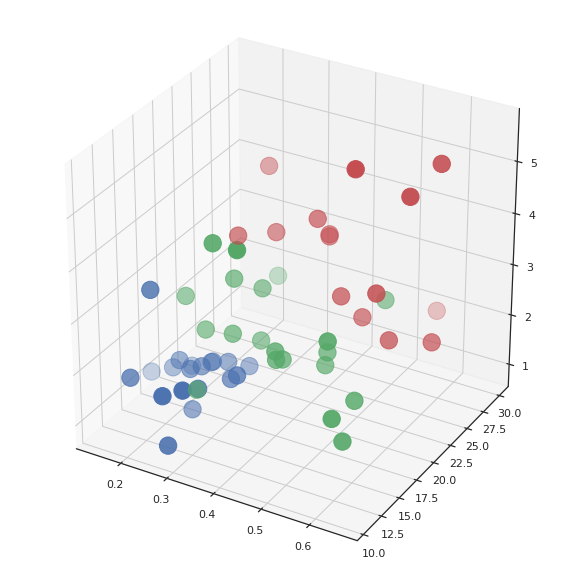

In [11]:
model = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(data[['nonflavanoid_phenols',  'alcalinity_of_ash','malic_acid']],
                 data.target, test_size=0.3, random_state=109)
model.fit(X_train, y_train)
predicted = model.predict(X_test)

f = plot.figure(figsize=(8, 8))
ax = Axes3D(f)
dt = data[['nonflavanoid_phenols', 'alcalinity_of_ash','malic_acid', 'target']]
targets = [0,1,2]
colors = ['b', 'g' , 'r']
for target, color in zip(targets, colors):
    ax.scatter(X_test.loc[predicted==target, 'nonflavanoid_phenols'], 
               X_test.loc[predicted==target, 'alcalinity_of_ash'],
               X_test.loc[predicted==target, 'malic_acid'], s=300, c=color, marker='o')
plot.show()

In [12]:
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))
mine_accuracy = metrics.accuracy_score(y_test, predicted)
print(metrics.accuracy_score(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.74      0.67      0.70        21
         1.0       0.50      0.53      0.51        19
         2.0       0.60      0.64      0.62        14

    accuracy                           0.61        54
   macro avg       0.61      0.61      0.61        54
weighted avg       0.62      0.61      0.61        54

[[14  6  1]
 [ 4 10  5]
 [ 1  4  9]]
0.6111111111111112


#### PCA Analysis

In [13]:
pca = PCA(n_components=2)
x = data.iloc[:,0:len(data.columns)].values
df = data[['nonflavanoid_phenols', 'alcalinity_of_ash','malic_acid', 'target']]
principalComponents = pca.fit_transform(x)
pca_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
pca_complete = pd.concat([pca_df, df[['target']]], axis = 1)
pca_complete.describe()

,principal component 1,principal component 2,target
count,1.780000e+02,1.780000e+02,178.000000
mean,-4.087617e-14,2.794269e-16,0.938202
std,3.149635e+02,1.313532e+01,0.775035
min,-4.690589e+02,-2.750429e+01,0.000000
25%,-2.461410e+02,-8.329965e+00,0.000000
50%,-7.352618e+01,-3.270653e+00,1.000000
75%,2.385654e+02,5.449091e+00,2.000000
max,9.331187e+02,5.879446e+01,2.000000


In [14]:
pca_complete.tail(10)

,principal component 1,principal component 2,target
168,3.181105,5.394422,2.0
169,-116.676332,14.535876,2.0
170,-236.922576,0.464972,2.0
171,-277.084897,-8.738468,2.0
172,-87.028953,-7.101907,2.0
173,-6.981858,-4.538116,2.0
174,3.129945,2.338236,2.0
175,88.456310,18.779644,2.0
176,93.454472,18.674180,2.0
177,-186.944619,-0.211063,2.0


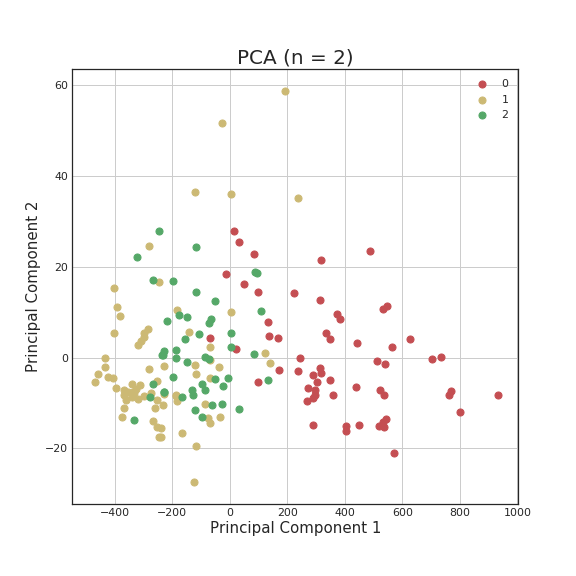

In [15]:
fig = plot.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA (n = 2)', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'y', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pca_complete['target'] == target
    ax.scatter(pca_complete.loc[indicesToKeep, 'principal component 1'],
               pca_complete.loc[indicesToKeep, 'principal component 2'],
               c = color, s = 50)
ax.legend(targets)
ax.grid()

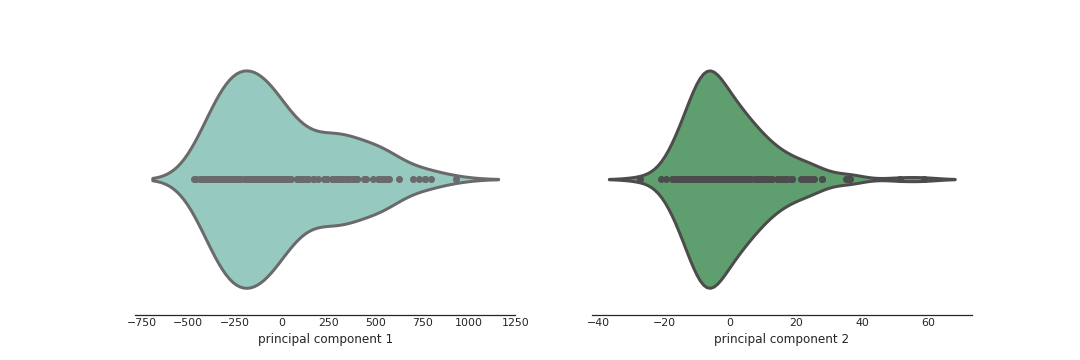

In [16]:
f = plot.figure(figsize=(15, 5))
ax = f.add_subplot(1,2,1)
sns.violinplot(pca_complete['principal component 1'], 
               palette="Set3", inner="points", cut=2, linewidth=3)
sns.despine(left=True)
ax1 = f.add_subplot(1,2,2)
sns.violinplot(pca_complete['principal component 2'], 
               color='g', inner="points", cut=2, linewidth=3)
sns.despine(left=True)

#### Naive bayes on the pca components

In [17]:
model = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(pca_df, pca_complete.target, test_size=0.3, random_state=109)
model.fit(X_train, y_train)
predicted = model.predict(X_test)

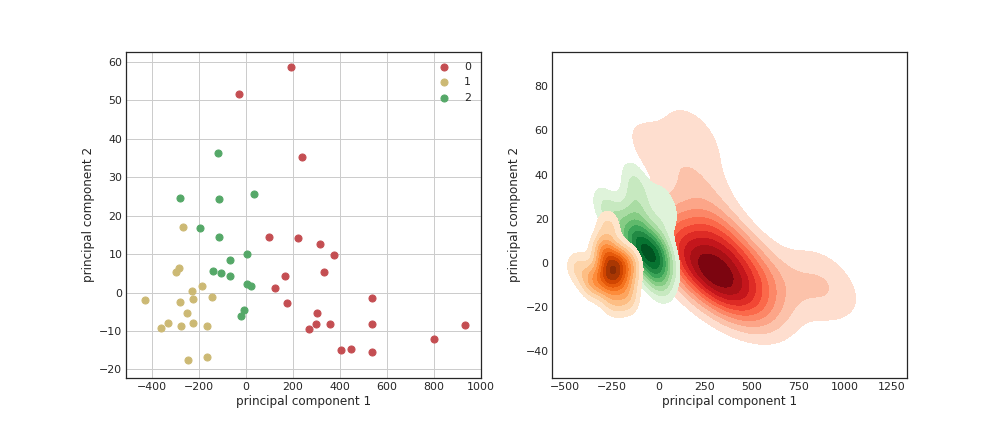

In [18]:
fig = plot.figure(figsize = (14,6))
ax = fig.add_subplot(1,2,1)
ax.set_xlabel('principal component 1', fontsize = 12)
ax.set_ylabel('principal component 2', fontsize = 12)
targets = [0, 1, 2]
predicted.ravel()
for target, color in zip(targets,colors):
    indicesToKeep = predicted == target
    ax.scatter(X_test.loc[indicesToKeep, 'principal component 1'],
               X_test.loc[indicesToKeep, 'principal component 2'],
               c = color, s = 50)
ax.legend(targets)
ax.grid()

ax = fig.add_subplot(1,2,2)
ax = sns.kdeplot(X_test.loc[predicted == 0, 'principal component 1'],
                 X_test.loc[predicted == 0,'principal component 2'],
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(X_test.loc[predicted == 2,'principal component 1'],
                 X_test.loc[predicted == 2,'principal component 2'],
                 cmap="Greens", shade=True, shade_lowest=False)
ax = sns.kdeplot(X_test.loc[predicted == 1,'principal component 1'],
                 X_test.loc[predicted == 1,'principal component 2'],
                 cmap="Oranges", shade=True, shade_lowest=False)

In [19]:
print("Explained Variance")
print("   Component 1 ratio:", pca.explained_variance_ratio_[0], ", variance:", pca.explained_variance_[0])
print("   Component 2 ratio:", pca.explained_variance_ratio_[1], ", variance:", pca.explained_variance_[1])
print("Total Explained Variance %3.2f"%sum(pca.explained_variance_ratio_))

Explained Variance
   Component 1 ratio: 0.9980876253882408 , variance: 99202.03073131487
   Component 2 ratio: 0.0017359185077007913 , variance: 172.5365957533101
Total Explained Variance 1.00


In [20]:
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))
pca_accuracy = metrics.accuracy_score(y_test, predicted)
print(metrics.accuracy_score(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84        21
         1.0       0.65      0.58      0.61        19
         2.0       0.53      0.57      0.55        14

    accuracy                           0.69        54
   macro avg       0.67      0.67      0.67        54
weighted avg       0.68      0.69      0.68        54

[[18  0  3]
 [ 4 11  4]
 [ 0  6  8]]
0.6851851851851852


#### Naive bayes on the raw data splitting

In [21]:
trainSize = int(0.7*len(wines['data']))

data_train = []
target_train = []
copy_train = list(wines['data'])
copy_test = list(wines['target'])
while len(data_train)!=trainSize:
    index = random.randrange(len(copy_train))
    data_train.append(copy_train.pop(index))
    target_train.append(copy_test.pop(index))

testSize =len(wines['data'])- trainSize
data_test =[]
target_test = []
copy_train = list(wines['data'])
copy_test = list(wines['target'])
while len(data_test)!=testSize:
    index = random.randrange(len(copy_train))
    data_test.append(copy_train.pop(index))
    target_test.append(copy_test.pop(index))

print('Wines dataset size: ', len(wines['data']))
print('Train dataset size: ', trainSize)
print('Test size: ', testSize)

Wines dataset size:  178
Train dataset size:  124
Test size:  54


In [22]:
model = GaussianNB()
model.fit(data_train, target_train)
expected = model.predict(data_test);
print(metrics.classification_report(expected, target_test))
print(metrics.confusion_matrix(expected, target_test))
raw_accuracy = metrics.accuracy_score(expected, target_test)
print(metrics.accuracy_score(expected, target_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.96      1.00      0.98        27
           2       1.00      0.92      0.96        13

    accuracy                           0.98        54
   macro avg       0.99      0.97      0.98        54
weighted avg       0.98      0.98      0.98        54

[[14  0  0]
 [ 0 27  0]
 [ 0  1 12]]
0.9814814814814815


#### Classic Naive bayes

In [23]:
model = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(wines.data, wines.target, test_size=0.3, random_state=109)
model.fit(X_train, y_train)
predicted = model.predict(X_test)

In [24]:
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))
classic_accuracy = metrics.accuracy_score(y_test, predicted)
print(metrics.accuracy_score(y_test, predicted))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.94      0.79      0.86        19
           2       0.88      1.00      0.93        14

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54

[[20  1  0]
 [ 2 15  2]
 [ 0  0 14]]
0.9074074074074074


#### Comparing accuracies

In [25]:
print('All accuracies')
print('   My accuracy: ',mine_accuracy)
print('   PCA accuracy: ',pca_accuracy)
print('   Raw accuracy: ', raw_accuracy)
print('   Classic accuracy: ', classic_accuracy)

All accuracies
   My accuracy:  0.6111111111111112
   PCA accuracy:  0.6851851851851852
   Raw accuracy:  0.9814814814814815
   Classic accuracy:  0.9074074074074074
